In [2]:
import requests 
import pandas as pd 
import numpy as np 

/Users/nandanprince/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
df = pd.read_csv("WID_data_IN.csv", sep=";")
df.shape

(734991, 7)

In [4]:
df['variable'].unique()

array(['ehfcari999', 'ehfghdi999', 'ehfghgi999', ..., 'rdiincj999',
       'tptincj992', 'tptincj999'], dtype=object)

In [5]:
df_filtered = df[df['variable'].str.lower().str.startswith("sptinc")]
df_filtered.shape

(64345, 7)

In [6]:
df_filtered.head()

,country,variable,percentile,year,value,age,pop
43531,IN,sptincj992,p90p99,1951,0.2515,992,j
43532,IN,sptincj992,p90p99,1952,0.2429,992,j
43533,IN,sptincj992,p90p99,1953,0.2492,992,j
43534,IN,sptincj992,p90p99,1954,0.2533,992,j
43535,IN,sptincj992,p90p99,1955,0.2584,992,j


In [7]:
df_filtered['year'].unique()

array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 1820, 1850, 1880, 1900, 1910,
       1920, 1930, 1940, 1950, 2023, 2024])

In [8]:
df_year = df_filtered[df_filtered['year'] >= 2024]
df_year 

,country,variable,percentile,year,value,age,pop
309344,IN,sptincj999,p4p100,2024,0.9954,999,j
376576,IN,sptincj999,p0p1,2024,0.0008,999,j
376796,IN,sptincj999,p0p10,2024,0.0164,999,j
377144,IN,sptincj999,p0p100,2024,1.0000,999,j
377282,IN,sptincj999,p0p11,2024,0.0187,999,j
...,...,...,...,...,...,...,...
585468,IN,sptincj992,p99p99.1,2024,0.0091,992,j
585551,IN,sptincj992,p9p10,2024,0.0022,992,j
585634,IN,sptincj992,p9p100,2024,0.9857,992,j
613071,IN,sptincj999,p1p100,2024,0.9992,999,j


In [9]:
df_year[['p_start', 'p_end']] = df_year['percentile'].str.extract(r'p(\d+\.?\d*)p(\d+\.?\d*)').astype("float")
df_year.head()

/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_60778/2424675687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year[['p_start', 'p_end']] = df_year['percentile'].str.extract(r'p(\d+\.?\d*)p(\d+\.?\d*)').astype("float")
/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_60778/2424675687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year[['p_start', 'p_end']] = df_year['percentile'].str.extract(r'p(\d+\.?\d*)p(\d+\.?\d*)').astype("float")


,country,variable,percentile,year,value,age,pop,p_start,p_end
309344,IN,sptincj999,p4p100,2024,0.9954,999,j,4.0,100.0
376576,IN,sptincj999,p0p1,2024,0.0008,999,j,0.0,1.0
376796,IN,sptincj999,p0p10,2024,0.0164,999,j,0.0,10.0
377144,IN,sptincj999,p0p100,2024,1.0000,999,j,0.0,100.0
377282,IN,sptincj999,p0p11,2024,0.0187,999,j,0.0,11.0


In [12]:
df_year[(df_year['p_start']==0) & (df_year['p_end']==50)]


,country,variable,percentile,year,value,age,pop,p_start,p_end
385097,IN,sptincj999,p0p50,2024,0.1502,999,j,0.0,50.0
557497,IN,sptincj992,p0p50,2024,0.1502,992,j,0.0,50.0


In [26]:
df_sorted = df_year.sort_values(by='p_start', ascending=True).reset_index(drop=True)
df_sorted.head(20)

,country,variable,percentile,year,value,age,pop,p_start,p_end
0,IN,sptincj992,p0p1,2024,0.0008,992,j,0.0,1.0
1,IN,sptincj992,p0p93,2024,0.4758,992,j,0.0,93.0
2,IN,sptincj992,p0p92,2024,0.4536,992,j,0.0,92.0
3,IN,sptincj992,p0p91,2024,0.4366,992,j,0.0,91.0
4,IN,sptincj992,p0p90,2024,0.4232,992,j,0.0,90.0
5,IN,sptincj992,p0p9,2024,0.0143,992,j,0.0,9.0
6,IN,sptincj992,p0p89,2024,0.4119,992,j,0.0,89.0
7,IN,sptincj992,p0p88,2024,0.4013,992,j,0.0,88.0
8,IN,sptincj992,p0p87,2024,0.3910,992,j,0.0,87.0
9,IN,sptincj992,p0p86,2024,0.3810,992,j,0.0,86.0


In [27]:
print(df_sorted['p_start'].min(), df_sorted['p_end'].max())

0.0 100.0


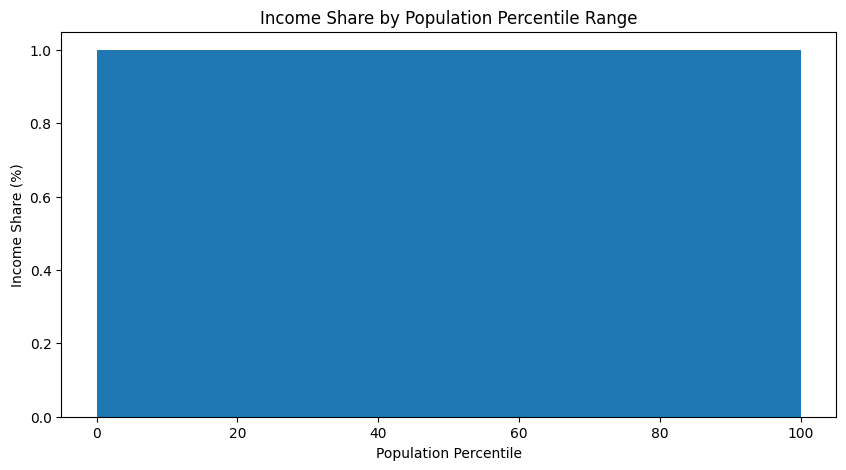

In [29]:
plt.figure(figsize=(10, 5))
plt.bar(
    df_sorted['p_start'],
    df_sorted['value'],
    width=df_sorted['p_end'] - df_sorted['p_start'],
    align='edge'
)


plt.xlabel("Population Percentile")
plt.ylabel("Income Share (%)")
plt.title("Income Share by Population Percentile Range")
plt.show()


In [31]:
import pandas as pd

def build_non_overlapping_bins(df):
    # Ensure sorted and clean
    df = df.copy()
    df = df.sort_values(['p_start', 'p_end']).reset_index(drop=True)

    # 1) all unique boundaries
    boundaries = sorted(set(df['p_start']).union(df['p_end']))

    bins = []

    # 2) loop over consecutive boundaries
    for a, b in zip(boundaries[:-1], boundaries[1:]):
        if b <= a:
            continue

        # all original intervals that fully cover [a, b]
        candidates = df[(df['p_start'] <= a) & (df['p_end'] >= b)]
        if candidates.empty:
            # no interval covers this piece – skip or raise
            continue

        # 3) choose the narrowest (most granular) covering interval
        candidates = candidates.assign(width=candidates['p_end'] - candidates['p_start'])
        chosen = candidates.loc[candidates['width'].idxmin()]

        bins.append({
            'p_start': a,
            'p_end': b,
            'value': chosen['value']
        })

    return pd.DataFrame(bins)

# Example:
df_bins = build_non_overlapping_bins(df_year)
df_bins.head()


,p_start,p_end,value
0,0.0,1.0,0.0008
1,1.0,2.0,0.0011
2,2.0,3.0,0.0013
3,3.0,4.0,0.0015
4,4.0,5.0,0.0017


In [32]:
df_bins.head(100)

,p_start,p_end,value
0,0.0,1.0,0.0008
1,1.0,2.0,0.0011
2,2.0,3.0,0.0013
3,3.0,4.0,0.0015
4,4.0,5.0,0.0017
...,...,...,...
95,95.0,96.0,0.0487
96,96.0,97.0,0.0518
97,97.0,98.0,0.0569
98,98.0,99.0,0.0696


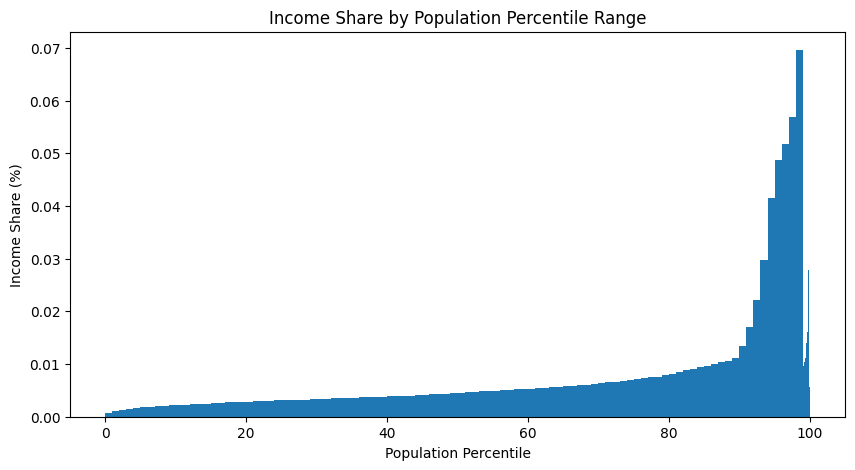

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(
    df_bins['p_start'],
    df_bins['value'],
    width=df_bins['p_end'] - df_bins['p_start'],
    align='edge'
)

plt.xlabel("Population Percentile")
plt.ylabel("Income Share (%)")
plt.title("Income Share by Population Percentile Range")
plt.show()


In [36]:
def rebin_to_fixed_tens(df):
    df = df.copy()
    df["width"] = df["p_end"] - df["p_start"]
    df["density"] = df["value"] / df["width"]

    fixed_bins = [(i, i+10) for i in range(0, 100, 10)]
    results = []

    for a, b in fixed_bins:
        bin_share = 0.0

        for _, row in df.iterrows():
            p_start = row["p_start"]
            p_end = row["p_end"]
            density = row["density"]

            # overlap between [a,b] and [p_start,p_end]
            overlap = max(0, min(b, p_end) - max(a, p_start))
            if overlap > 0:
                bin_share += density * overlap

        results.append({"bin_start": a, "bin_end": b, "income_share": bin_share})

    return pd.DataFrame(results)

# Run it
df_10bins = rebin_to_fixed_tens(df_year)
df_10bins


,bin_start,bin_end,income_share
0,0,10,12.234848
1,10,20,14.172726
2,20,30,16.177948
3,30,40,18.370381
4,40,50,20.830372
5,50,60,23.808097
6,60,70,27.212206
7,70,80,31.550478
8,80,90,37.765506
9,90,100,55.192838


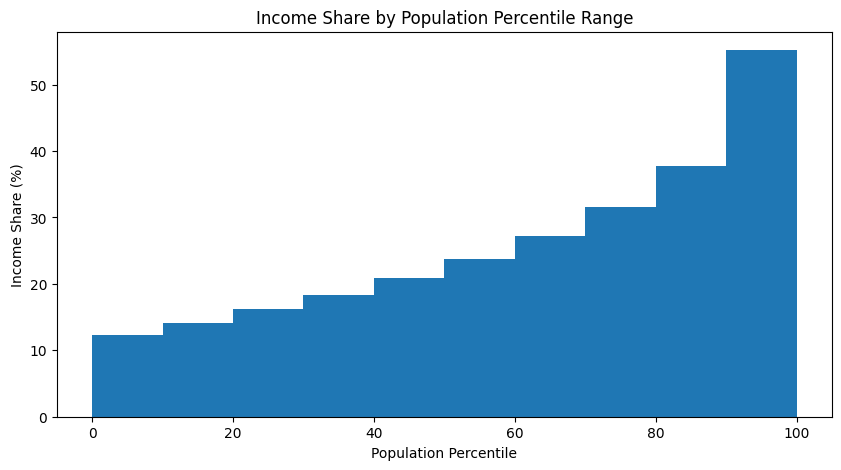

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(
    df_10bins['bin_start'],
    df_10bins['income_share'],
    width=df_10bins['bin_end'] - df_10bins['bin_start'],
    align='edge'
)

plt.xlabel("Population Percentile")
plt.ylabel("Income Share (%)")
plt.title("Income Share by Population Percentile Range")
plt.show()

In [70]:
df = pd.read_csv('main unemp table.csv')

In [71]:
# Force string type first
df['GEOID'] = df['GEOID'].astype(str)

# Take last 11 characters (Census tract length)
df['GEOID'] = df['GEOID'].str[-11:]

df['GEOID'].head(10)

0    36005000100
1    36005000200
2    36005000400
3    36005001600
4    36005001901
5    36005001902
6    36005001903
7    36005001904
8    36005002001
9    36005002002
Name: GEOID, dtype: object

In [72]:
#change dtype to string
df['GEOID'].dtype

dtype('O')

In [73]:
df['GEOID'].dtype

dtype('O')

In [74]:
df.to_csv('table_3.csv', index=False)